# TFY4345 - Classical Mechanics - Numerical Exercise part 3

### Alexander Arntzen | Knut Andre G. Prestsveen

This is a project in the course TFY4345 "Classical Mechanics" at the Norwegian University of Science and Technology. This notebook is the third part of the project, and studies <b>(...)</b>

The source code lies on [GitHub](https://github.com/kaprests/Pendulum).

In [1]:
'''Imports packages, functions and constants'''
# Simple pendulum with Eulers method:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from scipy.constants import g
from scipy.integrate import solve_ivp
from IPython.display import HTML

In [2]:
# Set common figure parameters:
newparams = {'axes.labelsize': 11, 'axes.linewidth': 1, 'savefig.dpi': 300, 
             'lines.linewidth': 1.0, 'figure.figsize': (8, 3),
             'ytick.labelsize': 10, 'xtick.labelsize': 10,
             'ytick.major.pad': 5, 'xtick.major.pad': 5,}
plt.rcParams.update(newparams)

In [3]:
'''Total energy of a pendulum'''
def energies(theta, omg):
    '''
    Calculates the kinetic, potential and total energies of a pendulum.
    
    Input:
        theta: angle between the pendulum and the vertical axis.
        omg: the angular velocity of the pendulum.
    Returns:
        T: the pendulum's kinetic energy.
        V: the pendulum's potential energy.
        E_tot: the pendulum's total energy.
    '''
    T = (1/2)*m*(l**2)*omg**2
    V = m*g*l*(1 - np.cos(theta))
    E_tot = T + V
    return T, V, E_tot

In [4]:
'''Parameters and properties'''
#Initial conditions and properties
m = 1 #kg 
l = g
theta_0 = 0.2 # rad 
omega_0 = 0.0 # rad 
q = 0.5 # s^-1
omg_d = 2/3 # driving freq. for forced oscillator
F_d = 1.2 # s^-2


sim_time = 60 #s, simulation time
dt = 0.1 # s, timestep


## Forced physical oscillator

Here we look at a forced physical pendulum, meaning no small angle approximations.

In [35]:
def ddt_omg_theta(t, y, omg_d=omg_d, q=q, F_d=F_d, g=g, l=l): 
    '''
    Functions defining the eqn. of motion as a pair of
    first order eqns.
    '''
    return [y[1], -g/l*np.sin(y[0]) - q*y[1] + F_d*np.sin(omg_d*t)]


def steady_amp_analytical(omg_d=omg_d, F_d=F_d, q=q):
    return F_d/(np.sqrt((np.sqrt(g/l)**2 - omg_d**2)**2 + (q*omg_d)**2))


def solve_and_plot(F_d=F_d, theta_0=theta_0):
    sol = solve_ivp(lambda t, y: ddt_omg_theta(t,y, omg_d=omg_d, q=q, F_d=F_d), t_span=[0, sim_time], y0=[theta_0, omega_0], max_step = dt )
    theta_vec = sol.y[0]
    omega_vec = sol.y[1]
    theta_vec += np.pi
    thetas = (theta_vec + 2 * np.pi) % (2 * np.pi)
    thetas -= np.pi
    plt.plot(sol.t, thetas,".",label = "Angle numeric ")
    plt.xlabel("Time [s]")
    plt.ylabel("Angle [rad]")
    plt.legend()
    plt.title(f"Driving force:{F_d}")
    plt.show()
    
    plt.plot(sol.t, omega_vec,".",label = "Angle numeric ")
    plt.xlabel("Time [s]")
    plt.ylabel("Angular velocety [rad/s]")
    plt.legend()
    plt.title(f"Driving force:{F_d}")
    plt.show()
    
    
def solve_two_and_plot_diff(F_d=F_d, theta_0=theta_0, F_d2=F_d, theta_02=theta_0):
    sol = solve_ivp(lambda t, y: ddt_omg_theta(t,y, omg_d=omg_d, q=q, F_d=F_d), t_span=[0, sim_time], y0=[theta_0, omega_0], max_step = dt )
    sol2 = solve_ivp(lambda t, y: ddt_omg_theta(t,y, omg_d=omg_d, q=q, F_d=F_d2), t_span=[0, sim_time], y0=[theta_02, omega_0], max_step = dt )
    delta_theta_vec = np.abs(sol2.y[0] - sol.y[0])
    delta_theta_vec += np.pi
    deltas= (delta_theta_vec + 2 * np.pi) % (2 * np.pi)
    deltas -= np.pi
    plt.semilogy(sol.t, deltas,".",label = "Difference")
    plt.xlabel("Time [s]")
    plt.ylabel("Angle [rad]")
    plt.legend()
    plt.title(f"Driving force:{F_d}")
    plt.show()
    
def solve_and_plot_phase(F_d=F_d, theta_0=theta_0,sim_time=sim_time):
    sol = solve_ivp(lambda t, y: ddt_omg_theta(t,y, omg_d=omg_d, q=q, F_d=F_d), t_span=[0, sim_time], y0=[theta_0, omega_0], max_step = dt )
    theta_vec = sol.y[0]
    omega_vec = sol.y[1]
    theta_vec += np.pi
    thetas = (theta_vec + 2 * np.pi) % (2 * np.pi)
    thetas -= np.pi
    plt.plot(thetas[0], omega_vec[0],"*",label = "Start")
    plt.plot(thetas[-1], omega_vec[-1],"*",label = "End")
    plt.plot(thetas, omega_vec,linewidth=0.01,label = "Tradjectory numeric ")
    plt.xlabel("Angle [s]")
    plt.ylabel("Omega [rad]")
    plt.legend(loc=1)
    plt.title(f"Driving force::{F_d}")
    plt.show()
    indexes = np.argwhere(sol.t % (np.pi*2/omg_d )<= dt)
    plt.plot(thetas[indexes], omega_vec[indexes] ,".",label= "Tradjectory  ")
    plt.xlabel("Angle [s]")
    plt.ylabel("Omega [rad]")
    plt.legend(loc=1)
    plt.title(f"Driving force::{F_d} stratosocpic")
    plt.show()
    
    return sol.t
    
    
    

Below we simulate the pendulum for 60 seconds with three different values of the driving force, and plot the angle at each timestep.

The angle is measured between the pendulums "rod" and the vertical axis, and an angle of zero corresponds to the pendulums equilibrium position.

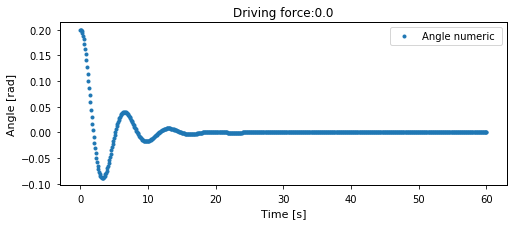

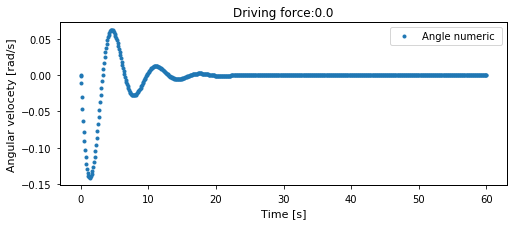

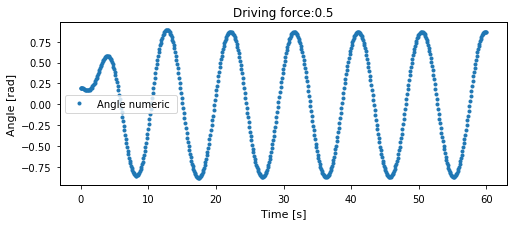

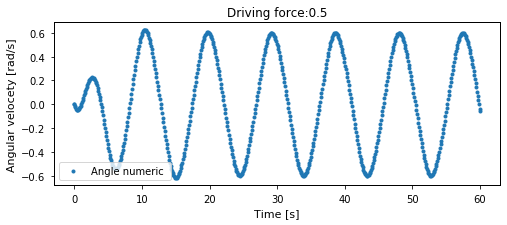

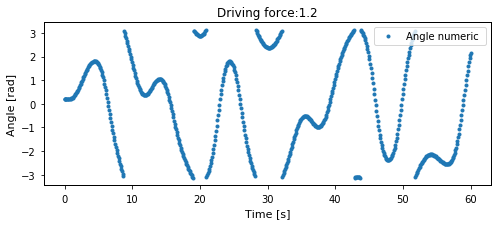

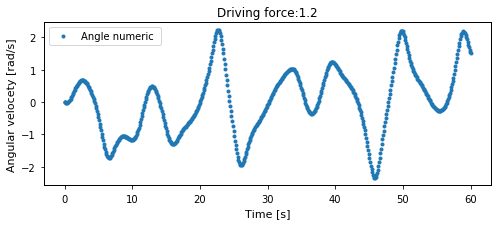

In [36]:
driving_forces = [0.0, 0.5, 1.2]

for f_d in driving_forces:
    solve_and_plot(F_d=f_d)

### Displacement of initial angle

Now we simulate again with driving forces 0.5 and 1.2, with the initial angle displaced by 0.001 rad.

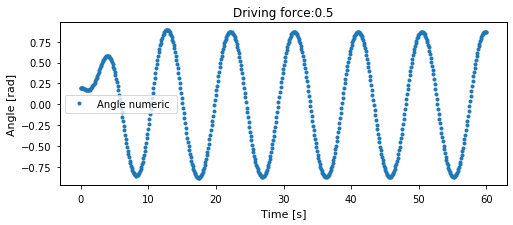

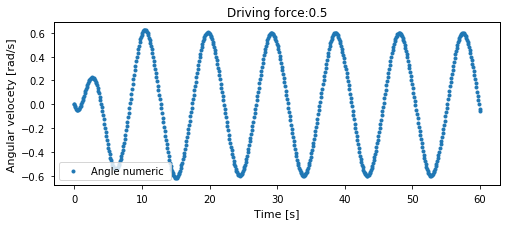

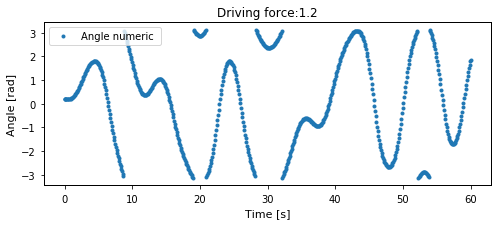

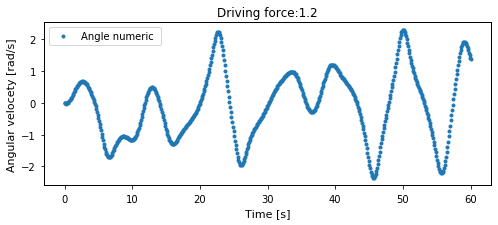

In [37]:
displacement = 0.001 # radians

for F_d in driving_forces[1:]:
    solve_and_plot(F_d=F_d, theta_0=theta_0+displacement)

By quick inspection we can see that the case with driving force of 1.2, that the small initial displacement has affected the pendulums motion, and we plot the difference between the angles of the cases with and without displacement.

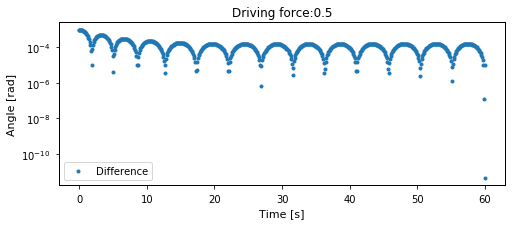

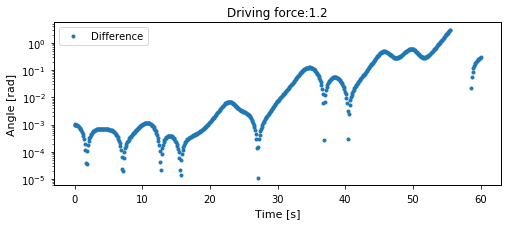

In [38]:
# Yea this seems weird to me, but also not totaly sure what to expect from these plots
for F_d in driving_forces[1:]:
    solve_two_and_plot_diff(F_d=F_d, F_d2=F_d, theta_02=theta_0+displacement)

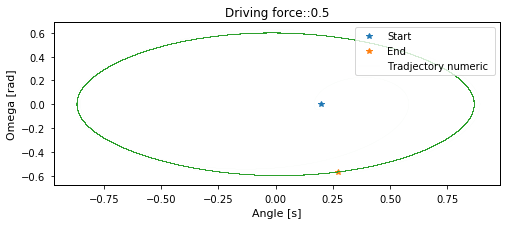

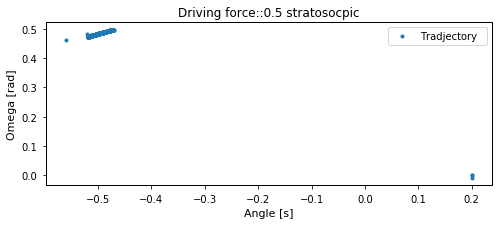

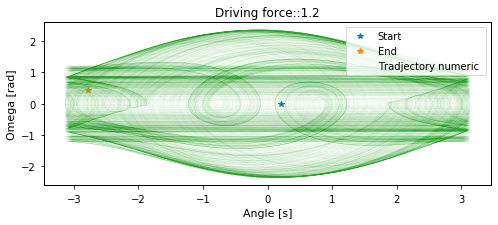

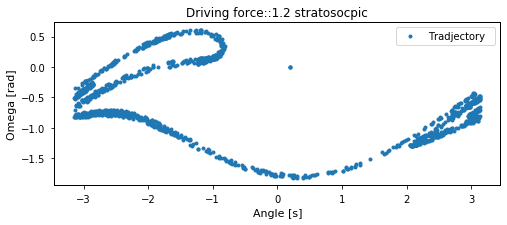

In [40]:
driving_forces = [ 0.5, 1.2]
t =0
for f_d in driving_forces:
     t = solve_and_plot_phase(F_d=f_d,sim_time=15000)
    

In the last plot we can indeed see the Poincare section. However, in the the first situation the system is not exhibit chaotic motion